Subquestion 3: Effect of remote and hybrid working on peak-hour / off peak-hour demand

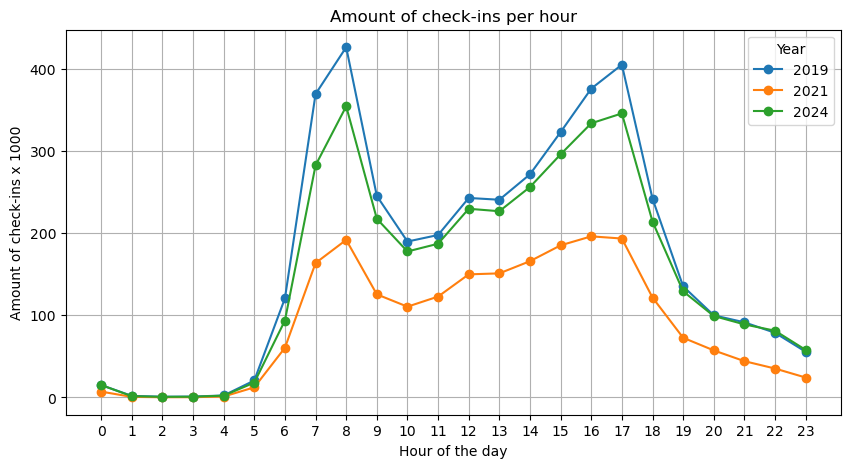

In [1]:
#Import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

#Path to datafolder, , sep=';' is necessary to ensure 'Hour' and 'Series 1' end up in different columns
df_2019 = pd.read_csv(r"c:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\q3_2019_workingdays_allmonths.csv", sep=';')
df_2021 = pd.read_csv(r"c:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\q3_2021_workingdays_allmonths.csv", sep=';')
df_2024 = pd.read_csv(r"c:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\q3_2024_workingdays_allmonths.csv", sep=';')

#Renaming column names
for df in [df_2019, df_2021, df_2024]:
    df.columns = ['hour', 'check-ins']
    #Ensure column hour is read as integer
    df['hour'] = df['hour'].astype(int)
    #In the CSV numbers have comma's instead of dots
    df['check-ins'] = df['check-ins'].str.replace(',', '.').astype(float)

#Plotting
plt.figure(figsize=(10, 5))

#2019
hourly_2019 = df_2019.groupby('hour')['check-ins'].sum().reset_index()
plt.plot(hourly_2019['hour'], hourly_2019['check-ins'], marker='o', label='2019')

#2021
hourly_2021 = df_2021.groupby('hour')['check-ins'].sum().reset_index()
plt.plot(hourly_2021['hour'], hourly_2021['check-ins'], marker='o', label='2021')

#2024
hourly_2024 = df_2024.groupby('hour')['check-ins'].sum().reset_index()
plt.plot(hourly_2024['hour'], hourly_2024['check-ins'], marker='o', label='2024')

#Plot table
plt.title("Amount of check-ins per hour")
plt.xlabel("Hour of the day")
plt.ylabel("Amount of check-ins x 1000")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="Year")
plt.show()

The code below goes for all transportmodes ():

Totaal (all modes of travel combined), Personenauto (bestuurder) (traveller is driver), personenauto (passagier) (driving with someone else), trein (travel by train), bus/tram/metro (public transport on the road or underground), Fiets (travel by bike), Lopen (walking), Overige vervoerwijze (everything else; scooter/boat/etc)

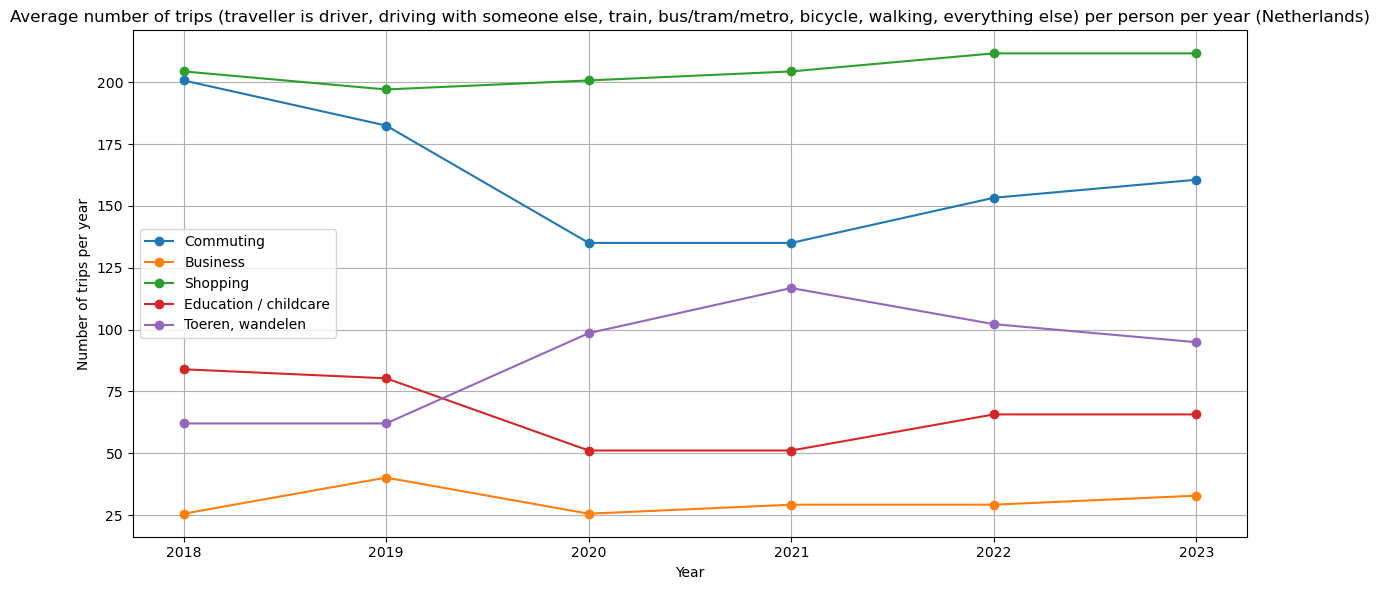

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading csv
path = r"C:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\table__84710NED.csv"
df = pd.read_csv(path)

# Deleting whitespaces in columnnames
df.columns = df.columns.str.strip()

# Filtering: only 'Total' transportmode, no 'Total' travelmotive, only NL
df_filtered = df[
    (df['Vervoerwijzen'] == 'Totaal') &
    (df['Reismotieven'] != 'Totaal') &
    (df['Regio\'s'] == 'Nederland')
].copy()

# Convert year and value to right datatype
df_filtered['Perioden'] = df_filtered['Perioden'].astype(int)

# Columnname for daily average
kolom = 'Gemiddeld per persoon per dag Verplaatsingen (aantal)'

# Converting string to float if necessary
if df_filtered[kolom].dtype == object:
    df_filtered[kolom] = df_filtered[kolom].str.replace(',', '.').astype(float)

# Daily average to yearly (365 days)
df_filtered['Per jaar'] = df_filtered[kolom] * 365

# Translation dictionary 
translation = {
    'Van en naar het werk': 'Commuting',
    'Zakelijk, beroepsmatig': 'Business',
    'Onderwijs volgen, cursus, kinderopvang': 'Education / childcare',
    'Winkelen, boodschappen doen': 'Shopping',
    'Sociaal bezoek': 'Social visit',
    'Uitgaan': 'Leisure / going out',
    'Sport': 'Sports',
    'Wandelen of fietsen': 'Walking / cycling',
    'Vakantie, dagje uit': 'Holiday / day trip',
    'Overig': 'Other'
}

# Apply translations
df_filtered['Reismotieven_eng'] = df_filtered['Reismotieven'].replace(translation)

# Linegraph per travelmotive (only NL)
plt.figure(figsize=(12,6))
for motief in df_filtered['Reismotieven_eng'].unique():
    df_motief = df_filtered[df_filtered['Reismotieven_eng'] == motief]
    plt.plot(df_motief['Perioden'], df_motief['Per jaar'], marker='o', label=motief)

plt.title('Average number of trips (traveller is driver, driving with someone else, train, bus/tram/metro, bicycle, walking, everything else) per person per year (Netherlands)')
plt.xlabel('Year')
plt.ylabel('Number of trips per year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This table goes for all travels by train, bus/tram/metro (all types of public transport)

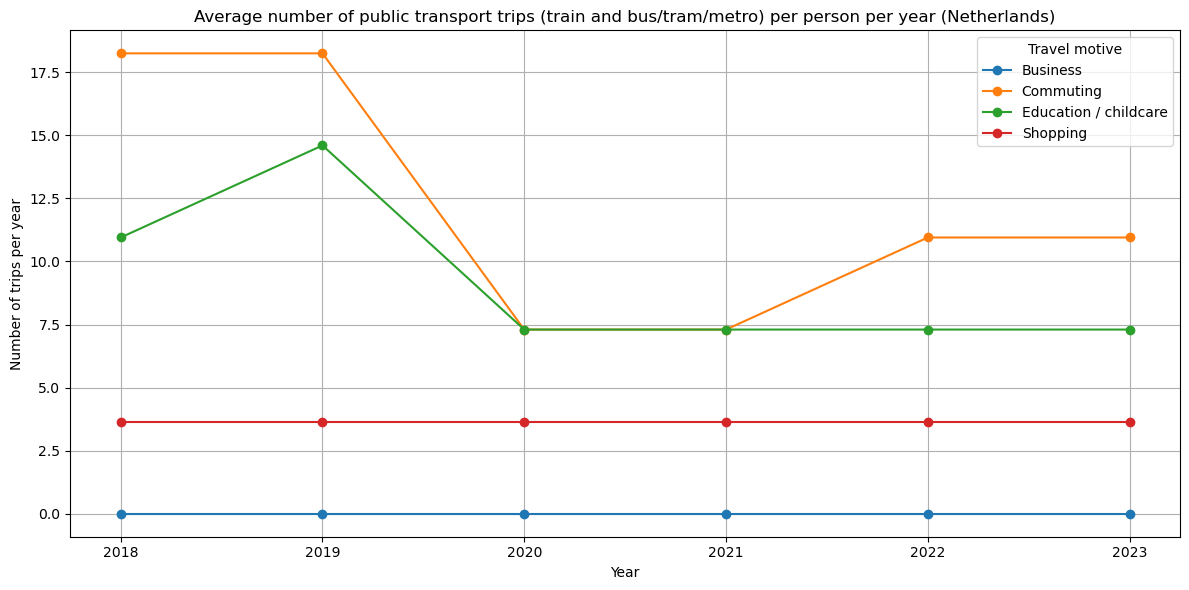

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading csv
path = r"C:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\table__84710NED.csv"
df = pd.read_csv(path)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Filter: all public transport; train and bus/tram/metro, all travel motives, Netherlands
df_filtered = df[
    df['Vervoerwijzen'].isin(['Trein', 'Bus/tram/metro']) &
    (df['Reismotieven'] != 'Totaal') &
    (df["Regio's"] == 'Nederland')
].copy()

# Convert column to strings
kolom = 'Gemiddeld per persoon per dag Verplaatsingen (aantal)'
df_filtered[kolom] = (
    df_filtered[kolom]
    .astype(str)
    .str.replace(',', '.', regex=False)
)
df_filtered[kolom] = pd.to_numeric(df_filtered[kolom], errors='coerce')
df_filtered = df_filtered.dropna(subset=[kolom])

# Converts values from 'Perioden' to strings
df_filtered['Perioden'] = df_filtered['Perioden'].astype(str).str.extract(r'(\d{4})').astype(int)

# Convert daily to yearly
df_filtered['Per jaar'] = df_filtered[kolom] * 365

# Translation dictionary
translation = {
    'Van en naar het werk': 'Commuting',
    'Zakelijk, beroepsmatig': 'Business',
    'Onderwijs volgen, cursus, kinderopvang': 'Education / childcare',
    'Winkelen, boodschappen doen': 'Shopping',
    'Sociaal bezoek': 'Social visit',
    'Uitgaan': 'Leisure / going out',
    'Sport': 'Sports',
    'Wandelen of fietsen': 'Walking / cycling',
    'Vakantie, dagje uit': 'Holiday / day trip',
    'Overig': 'Other'
}

df_filtered['Reismotieven_eng'] = df_filtered['Reismotieven'].replace(translation)

# Add types of public transport
df_grouped = df_filtered.groupby(['Perioden', 'Reismotieven_eng'])['Per jaar'].sum().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
for motief in df_grouped['Reismotieven_eng'].unique():
    df_motief = df_grouped[df_grouped['Reismotieven_eng'] == motief]
    plt.plot(df_motief['Perioden'], df_motief['Per jaar'], marker='o', label=motief)

plt.title('Average number of public transport trips (train and bus/tram/metro) per person per year (Netherlands)')
plt.xlabel('Year')
plt.ylabel('Number of trips per year')
plt.legend(title='Travel motive')
plt.grid(True)
plt.tight_layout()
plt.show()